In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [20]:
df=pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2/4/2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,1/28/2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,1/21/2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,1/14/2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [21]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [22]:
df['region'].value_counts()

Louisville             338
West                   338
Atlanta                338
RaleighGreensboro      338
Midsouth               338
Boise                  338
LasVegas               338
TotalUS                338
Spokane                338
GrandRapids            338
SanFrancisco           338
Columbus               338
DallasFtWorth          338
MiamiFtLauderdale      338
Southeast              338
NewYork                338
Orlando                338
Boston                 338
Houston                338
BuffaloRochester       338
CincinnatiDayton       338
LosAngeles             338
California             338
Philadelphia           338
StLouis                338
Detroit                338
BaltimoreWashington    338
HartfordSpringfield    338
NorthernNewEngland     338
Seattle                338
Roanoke                338
Nashville              338
Chicago                338
Portland               338
SanDiego               338
SouthCarolina          338
RichmondNorfolk        338
N

In [23]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [24]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

there is uncertain values are present in first column that is why i am droping that

Data Visualization

In [25]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [26]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


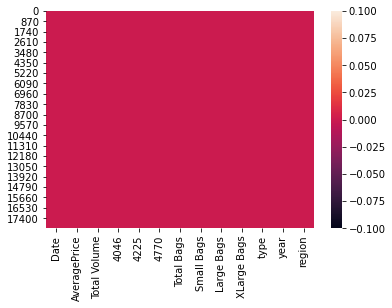

In [27]:
sns.heatmap(df.isnull())

too much gap in 75% to max value
therefore outliers are present in the dataset.
std is very high.

In [28]:
df.shape

(18249, 13)

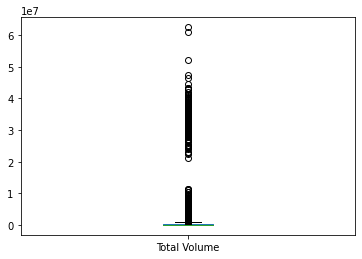

In [29]:
df['Total Volume'].plot.box()

too many ouliers are present.

AveragePrice       AxesSubplot(0.125,0.125;0.065678x0.755)
Total Volume    AxesSubplot(0.203814,0.125;0.065678x0.755)
4046            AxesSubplot(0.282627,0.125;0.065678x0.755)
4225            AxesSubplot(0.361441,0.125;0.065678x0.755)
4770            AxesSubplot(0.440254,0.125;0.065678x0.755)
Total Bags      AxesSubplot(0.519068,0.125;0.065678x0.755)
Small Bags      AxesSubplot(0.597881,0.125;0.065678x0.755)
Large Bags      AxesSubplot(0.676695,0.125;0.065678x0.755)
XLarge Bags     AxesSubplot(0.755508,0.125;0.065678x0.755)
year            AxesSubplot(0.834322,0.125;0.065678x0.755)
dtype: object

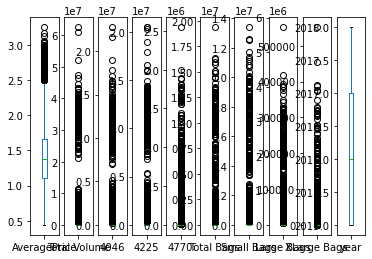

In [12]:
df.plot(kind='box',subplots=True)

almost in every column there are outliers present.

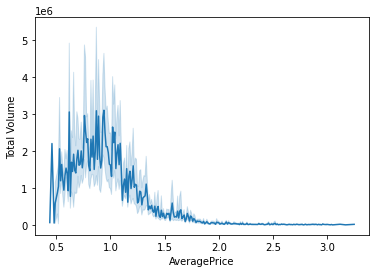

In [27]:
sns.lineplot(x='AveragePrice',y='Total Volume',data=df)

this indicates as the average price is low then our total volume is high and vise-versa

In [29]:
df['Date'].value_counts()

12/18/2016    108
8/23/2015     108
4/2/2017      108
12/27/2015    108
10/16/2016    108
             ... 
1/3/2016      108
3/20/2016     108
12/6/2015     107
6/25/2017     107
6/18/2017     107
Name: Date, Length: 169, dtype: int64

In [34]:
df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

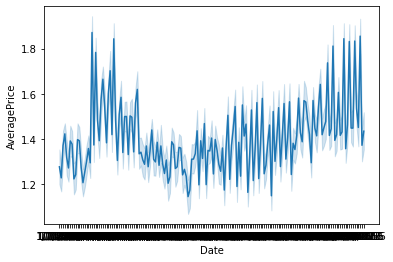

In [33]:
sns.lineplot(x='Date',y='AveragePrice',data=df)

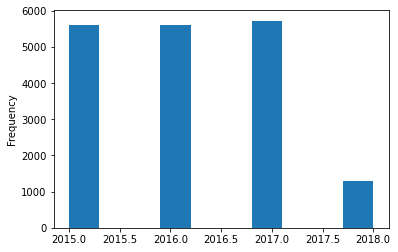

In [4]:
df['year'].plot(kind='hist')

the most no. of orders are obtain in 2017

In [30]:
le=LabelEncoder()
df['type']=le.fit_transform(df['type'])
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany
1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany
2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany
3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany
4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2/4/2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,WestTexNewMexico
18245,1/28/2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,WestTexNewMexico
18246,1/21/2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,WestTexNewMexico
18247,1/14/2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,WestTexNewMexico


we have converted the type column into 2 classes of avocado

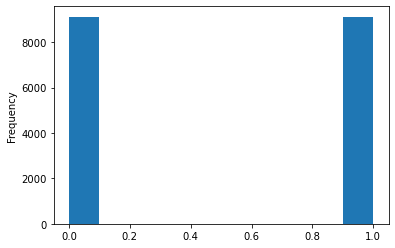

In [31]:
df['type'].plot(kind='hist')

In [32]:
df['type'].value_counts()

0    9126
1    9123
Name: type, dtype: int64

this indicates that are conventional avocado have more orders than organic

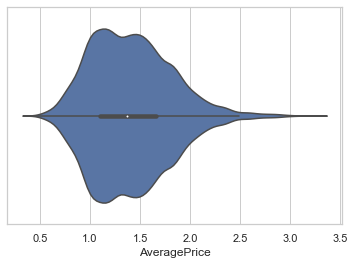

In [33]:
sns.set(style='whitegrid')
sns.violinplot(df['AveragePrice'])

most of the data are in range of 1.0 to 1.25

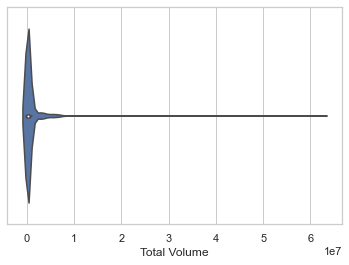

In [34]:
sns.violinplot(df['Total Volume'])

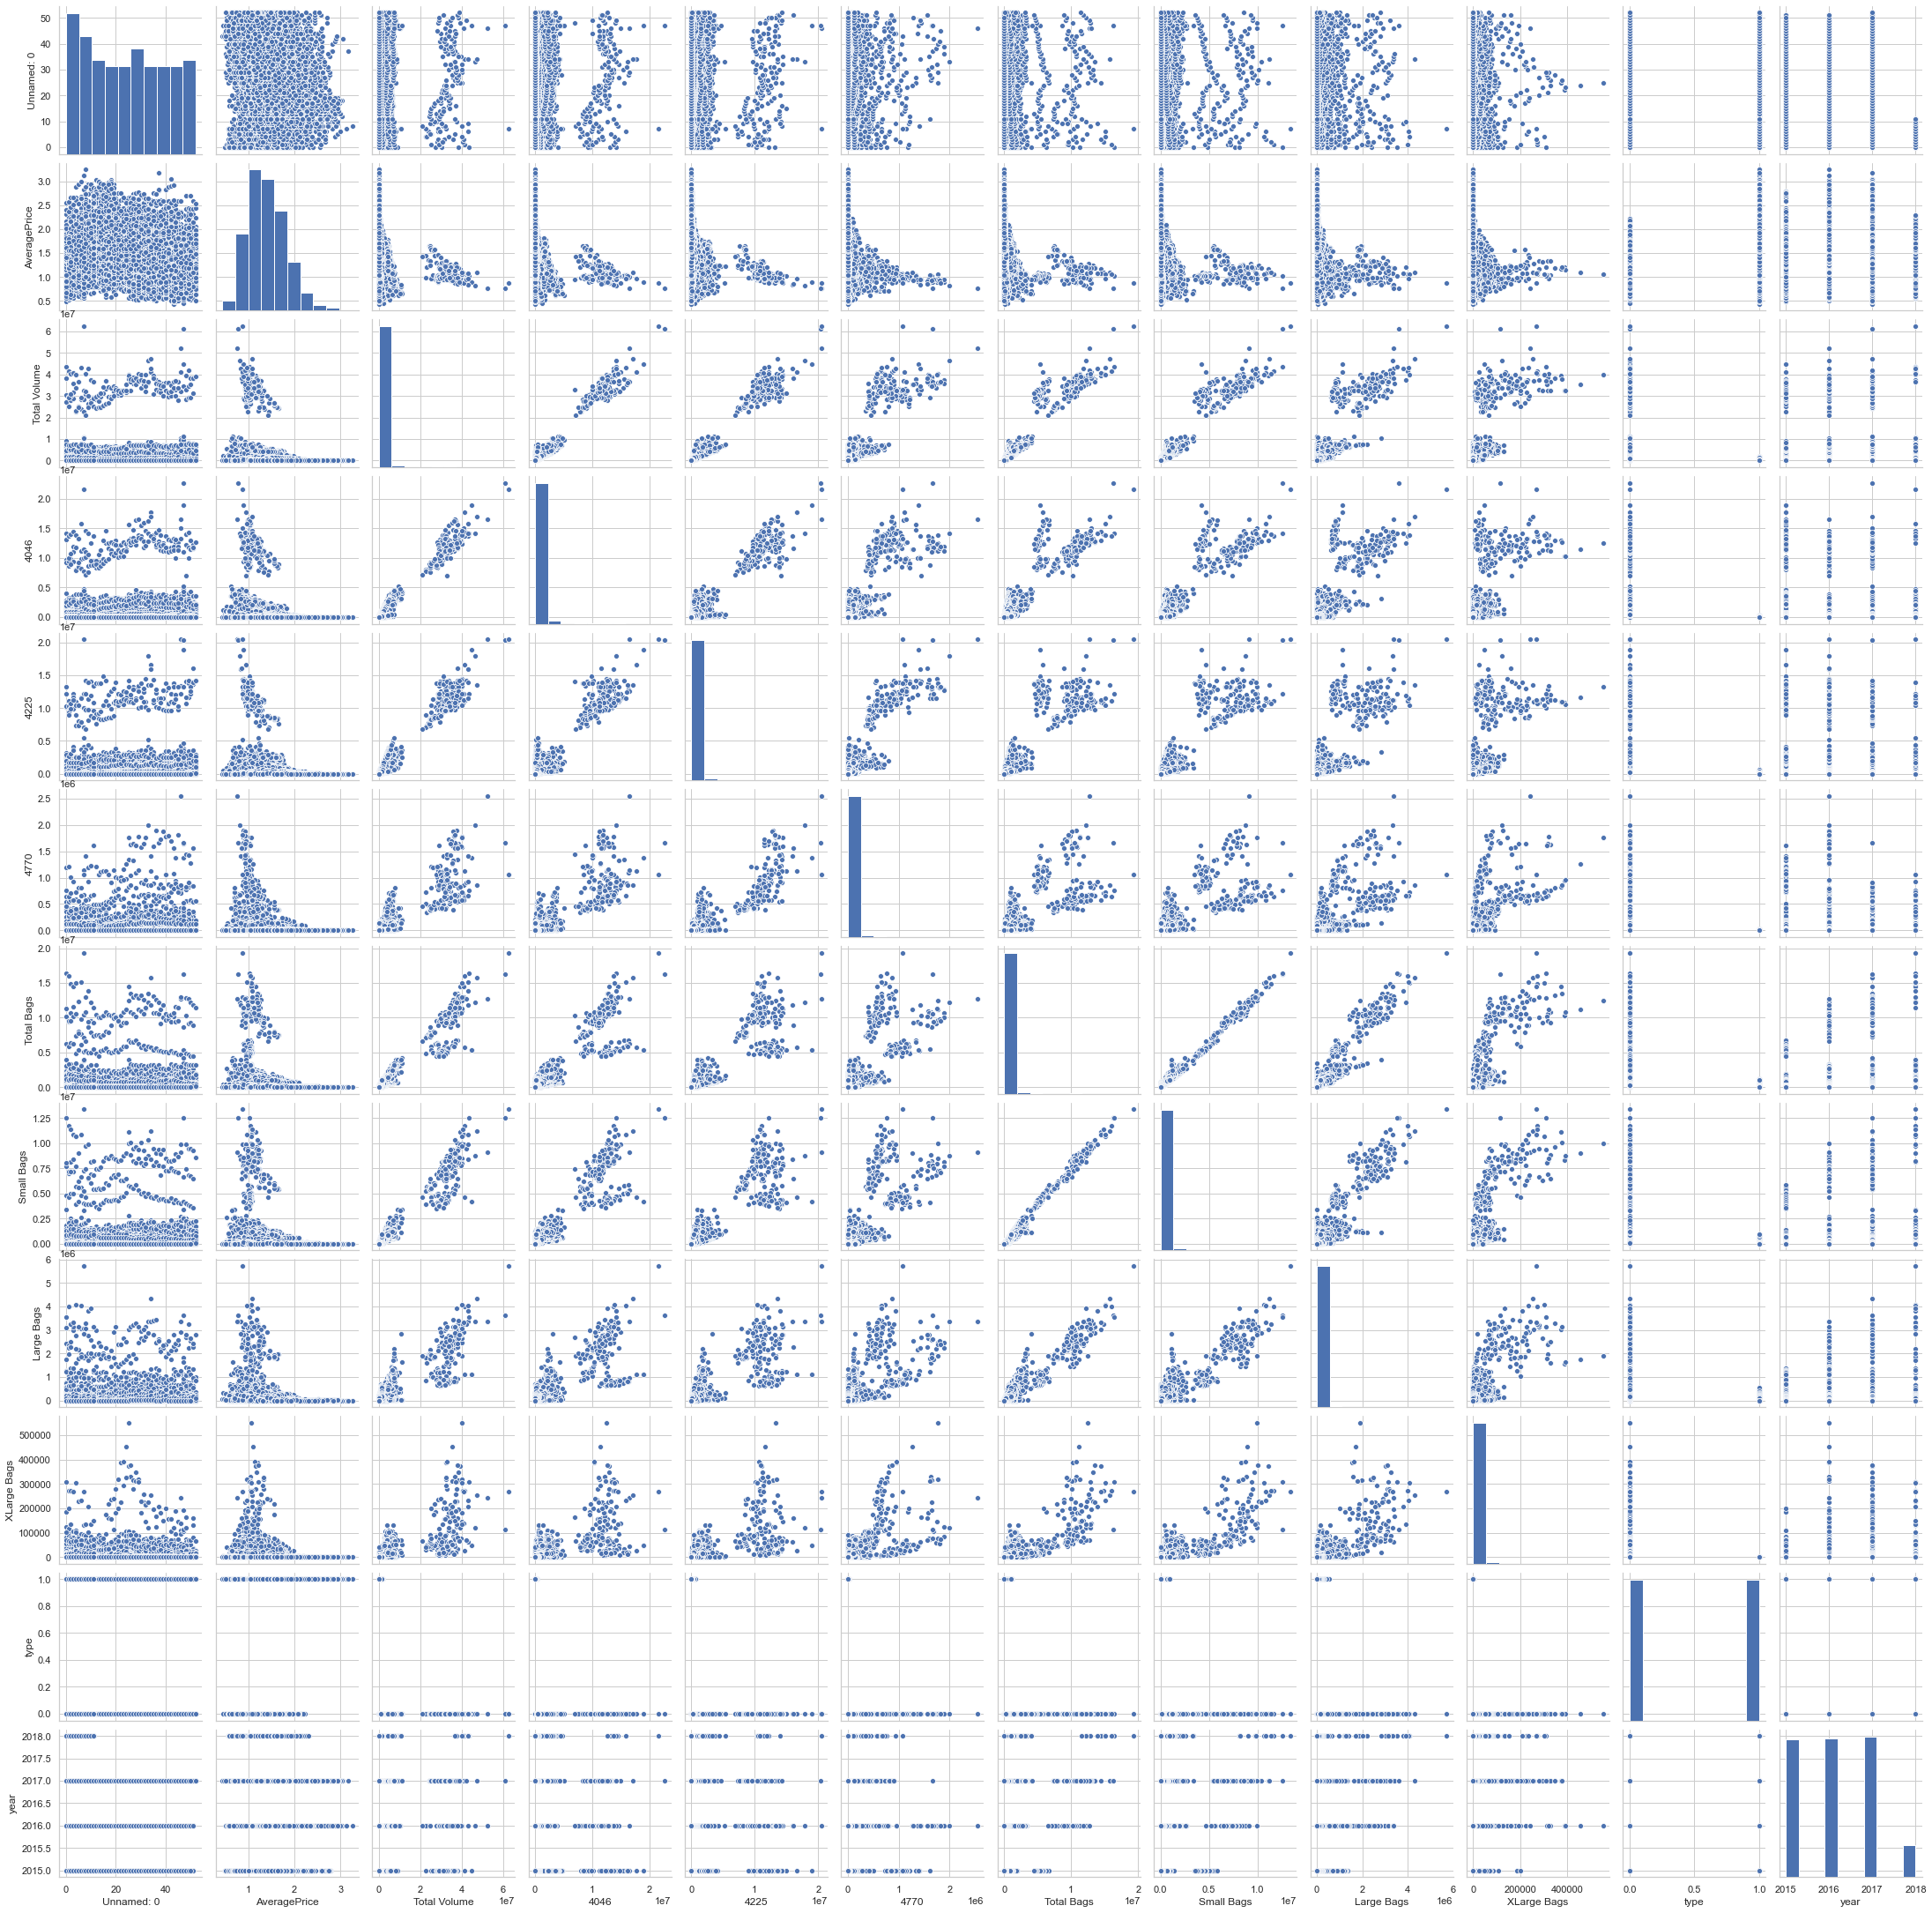

In [29]:
sns.pairplot(df)

In [13]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

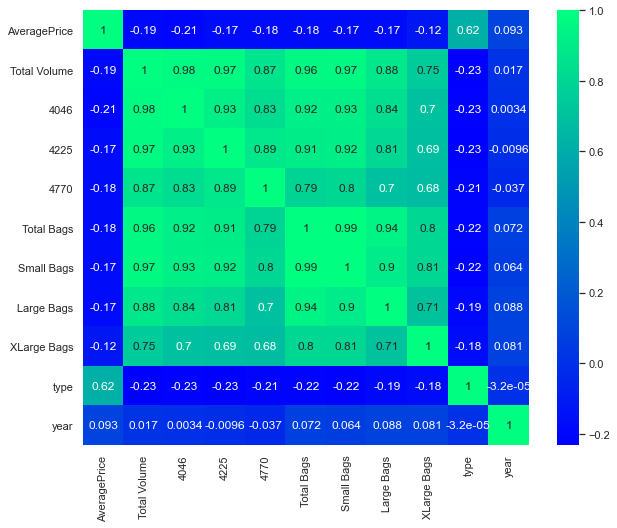

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='winter',annot=True)


the dataset in highy correlated.

# removing outliers

In [38]:
df.drop(['year'],axis=1,inplace=True)

In [39]:
df.drop(['Date'],axis=1,inplace=True)

In [40]:
df.drop(['region'],axis=1,inplace=True)

In [44]:
threshold=3
z=np.abs(zscore(df))
z

array([[0.18868864, 0.22771641, 0.23081597, ..., 0.22235202, 0.17557961,
        0.99983562],
       [0.13901962, 0.23042664, 0.23110251, ..., 0.22233464, 0.17557961,
        0.99983562],
       [1.18206895, 0.21208462, 0.23100731, ..., 0.22231148, 0.17557961,
        0.99983562],
       ...,
       [1.15237477, 0.24233073, 0.2306933 , ..., 0.22256082, 0.17557961,
        1.00016441],
       [1.30138182, 0.24162464, 0.2304279 , ..., 0.2225293 , 0.17557961,
        1.00016441],
       [0.53151208, 0.24125273, 0.22934712, ..., 0.22262764, 0.17557961,
        1.00016441]])

In [54]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(17651, 10)

In [55]:
df.shape

(18249, 10)

we have removed all the outliers that were present in the dataset.

# model selection

In [61]:
x=df_new.drop(['type'],axis=1)

In [65]:
y=df_new['type']

In [68]:
sc=StandardScaler()
x=sc.fit_transform(x)
x=pd.DataFrame(x)

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=43)

In [77]:
x_train.shape

(12355, 9)

In [78]:
x_test.shape

(5296, 9)

In [79]:
y_train.shape

(12355,)

In [80]:
y_test.shape

(5296,)

In [81]:
models=[LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB()]

In [90]:
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('the accuracy score of',m,'is:',accuracy_score(y_test,predm))
    print('confusion matrix of',m,confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))

the accuracy score of LogisticRegression() is: 0.9369335347432024
confusion matrix of LogisticRegression() [[2347  252]
 [  82 2615]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      2599
           1       0.91      0.97      0.94      2697

    accuracy                           0.94      5296
   macro avg       0.94      0.94      0.94      5296
weighted avg       0.94      0.94      0.94      5296

the accuracy score of SVC() is: 0.9509063444108762
confusion matrix of SVC() [[2436  163]
 [  97 2600]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2599
           1       0.94      0.96      0.95      2697

    accuracy                           0.95      5296
   macro avg       0.95      0.95      0.95      5296
weighted avg       0.95      0.95      0.95      5296

the accuracy score of DecisionTreeClassifier() is: 0.9862160120845922
confusion matrix of DecisionTreeClassi

from these results we can decide that our model is working with least errors on decision tree classifiers

In [94]:
dtc=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy'],'random_state':range(40,100)}
clf=GridSearchCV(dtc,parameters)
clf.fit(x,y)
clf.best_params_

{'criterion': 'gini', 'random_state': 68}

In [102]:
dtc=DecisionTreeClassifier('gini',random_state=68)
dtc.fit(x_train,y_train)
print('score',dtc.score(x_train,y_train))
preddtc=dtc.predict(x_test)
print('Accuracy score',accuracy_score(y_test,preddtc))
print('confusion matrix',confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

score 1.0
Accuracy score 0.9856495468277946
confusion matrix [[2557   42]
 [  34 2663]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2599
           1       0.98      0.99      0.99      2697

    accuracy                           0.99      5296
   macro avg       0.99      0.99      0.99      5296
weighted avg       0.99      0.99      0.99      5296



In [108]:
scores=cross_val_score(dtc,x,y,cv=5)
print('scores',scores)
print('mean scores',scores.mean())
print('standard deviation',scores.std())

scores [0.98329085 0.96373938 0.96883853 0.96260623 0.9407932 ]
mean scores 0.9638536379120424
standard deviation 0.013682158076445579


best scores for the best model for the given dataset

Text(0, 0.5, 'predicted Y')

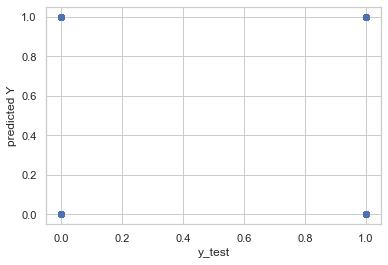

In [103]:
plt.scatter(y_test,preddtc)
plt.xlabel('y_test')
plt.ylabel('predicted Y')

In [106]:
import joblib

In [107]:
joblib.dump(dtc,'avocado_predicted.pkl')

['avocado_predicted.pkl']